In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def plot_results_from_json(json_file_path,save_path):
    try:
        with open(json_file_path, 'r') as json_file:
            data = json.load(json_file)
    except FileNotFoundError:
        print(f"File not found: {json_file_path}")
        return
    
    model_names = []
    accuracies = []
    drop_rates = []

    for model_name, metrics in data.items():
        model_names.append(model_name)
        accuracies.append(metrics['accuracy'])
        drop_rates.append(metrics['drop_rate'])

    num_models = len(model_names)
    x = np.arange(num_models)  # X-axis values

    # Define a pastel color palette
    pastel_palette = ['#FFC3A0', '#FF677D', '#D4A5A5', '#392F5A', '#31A2AC', '#61C0BF', '#FFD447']

    # Create a bar plot for both accuracy and drop rate side by side using pastel colors
    plt.figure(figsize=(12, 6))

    # Bar plot for accuracy
    plt.bar(x - 0.2, accuracies, width=0.4, color=pastel_palette[2], label='Accuracy')
    
    # Bar plot for drop rate
    plt.bar(x + 0.2, drop_rates, width=0.4, color=pastel_palette[3], label='Drop Rate')
    
    plt.xlabel('Models')
    plt.xticks(x, model_names, rotation=45, ha='right')
    plt.title('Accuracy and Drop Rate for Different Models')
    plt.legend(loc='upper right')

    # Add values as text labels above the bars
    for i, (acc, drop_rate) in enumerate(zip(accuracies, drop_rates)):
        plt.text(x[i] - 0.2, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', color='black')
        plt.text(x[i] + 0.2, drop_rate + 0.01, f'{drop_rate:.2f}', ha='center', va='bottom', color='black')

    plt.ylim(0, 1)

    # Save the figure as an image
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

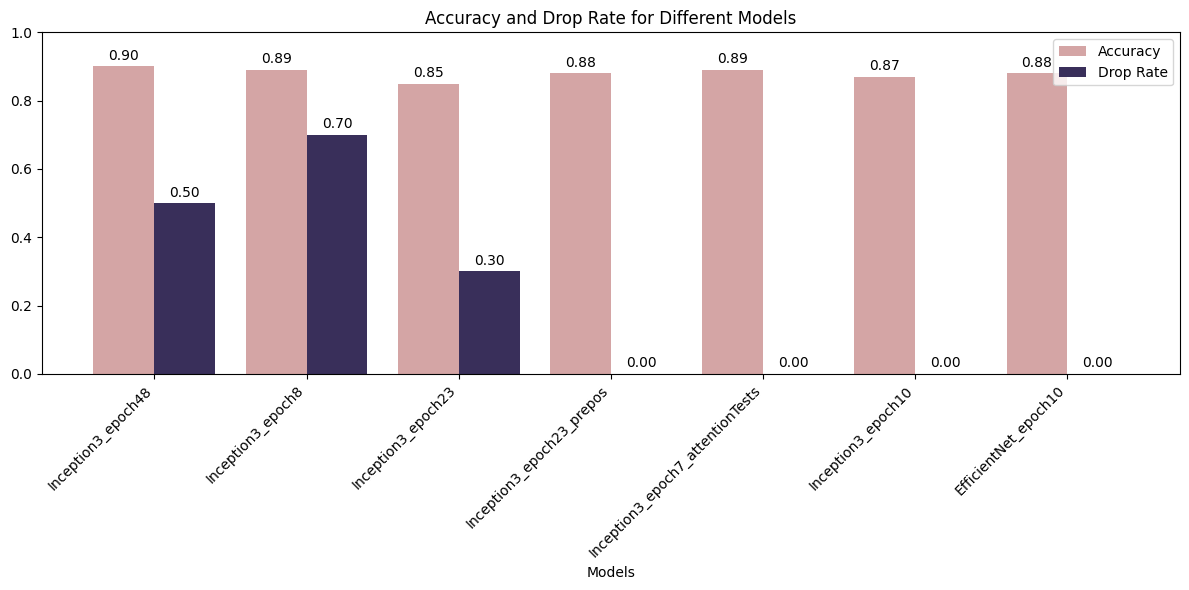

: 

In [15]:
plot_results_from_json('../classifiers/binary_classifier/results.json','../figures/binary_results.png')